<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Preamble" data-toc-modified-id="Preamble-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Preamble</a></span><ul class="toc-item"><li><span><a href="#General-parameters" data-toc-modified-id="General-parameters-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>General parameters</a></span></li><li><span><a href="#Functions" data-toc-modified-id="Functions-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Functions</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Return-simulation-dictionary" data-toc-modified-id="Return-simulation-dictionary-1.2.0.1"><span class="toc-item-num">1.2.0.1&nbsp;&nbsp;</span>Return simulation dictionary</a></span></li><li><span><a href="#Return-connectivity-dictionary" data-toc-modified-id="Return-connectivity-dictionary-1.2.0.2"><span class="toc-item-num">1.2.0.2&nbsp;&nbsp;</span>Return connectivity dictionary</a></span></li><li><span><a href="#Return-theo_difference" data-toc-modified-id="Return-theo_difference-1.2.0.3"><span class="toc-item-num">1.2.0.3&nbsp;&nbsp;</span>Return theo_difference</a></span></li><li><span><a href="#Function-to-find-root" data-toc-modified-id="Function-to-find-root-1.2.0.4"><span class="toc-item-num">1.2.0.4&nbsp;&nbsp;</span>Function to find root</a></span></li><li><span><a href="#Function-to-run-examples" data-toc-modified-id="Function-to-run-examples-1.2.0.5"><span class="toc-item-num">1.2.0.5&nbsp;&nbsp;</span>Function to run examples</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Backward-analysis" data-toc-modified-id="Backward-analysis-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Backward analysis</a></span><ul class="toc-item"><li><span><a href="#Examples" data-toc-modified-id="Examples-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Examples</a></span></li><li><span><a href="#Systematic" data-toc-modified-id="Systematic-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Systematic</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Normal-IPI" data-toc-modified-id="Normal-IPI-2.2.0.1"><span class="toc-item-num">2.2.0.1&nbsp;&nbsp;</span>Normal IPI</a></span></li></ul></li><li><span><a href="#Intersection-curves" data-toc-modified-id="Intersection-curves-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Intersection curves</a></span><ul class="toc-item"><li><span><a href="#This-quantities-actually-depend-on-g_a" data-toc-modified-id="This-quantities-actually-depend-on-g_a-2.2.1.1"><span class="toc-item-num">2.2.1.1&nbsp;&nbsp;</span>This quantities actually depend on g_a</a></span></li></ul></li></ul></li><li><span><a href="#Effects-of-the-ipi-base" data-toc-modified-id="Effects-of-the-ipi-base-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Effects of the ipi base</a></span></li></ul></li><li><span><a href="#Plot" data-toc-modified-id="Plot-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Plot</a></span><ul class="toc-item"><li><span><a href="#First-the-characterisation" data-toc-modified-id="First-the-characterisation-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>First the characterisation</a></span></li><li><span><a href="#Then-two-examples" data-toc-modified-id="Then-two-examples-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Then two examples</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Good-side" data-toc-modified-id="Good-side-3.2.0.1"><span class="toc-item-num">3.2.0.1&nbsp;&nbsp;</span>Good side</a></span></li><li><span><a href="#Wrong-side" data-toc-modified-id="Wrong-side-3.2.0.2"><span class="toc-item-num">3.2.0.2&nbsp;&nbsp;</span>Wrong side</a></span></li></ul></li></ul></li><li><span><a href="#Then-the-systematic-exploration-of-max-ipi" data-toc-modified-id="Then-the-systematic-exploration-of-max-ipi-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Then the systematic exploration of max ipi</a></span></li><li><span><a href="#Store" data-toc-modified-id="Store-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Store</a></span></li></ul></li></ul></div>

# Preamble

In [11]:
import  pprint
import  subprocess 
import sys 
sys.path.append('../')

import numpy as np
import scipy as sp
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns

%matplotlib inline

np.set_printoptions(suppress=True, precision=5)

from network import Protocol, NetworkManager, Network
from patterns_representation import PatternsRepresentation
from analysis_functions import calculate_persistence_time, calculate_recall_quantities, calculate_triad_connectivity
from plotting_functions import plot_weight_matrix, plot_network_activity_angle, plot_persistent_matrix

from scipy.optimize import brentq

## General parameters

In [2]:
epsilon = 10e-80
vmin = -3.0
remove = 0.010
dt = 0.0001
factor = 1.5

index1 = 1
index2 = 2
index3 = 3

In [25]:
sns.set(font_scale=3.5)
sns.set_style("whitegrid", {'axes.grid': False})
plt.rcParams['figure.figsize'] = (16, 12)
lw = 10
ms = 22
alpha_graph = 0.3
colors = sns.color_palette()

In [4]:
values_to_work = ['B21', 'w11', 'w21', 'beta1', 'beta2', 'B12', 'w12', 'B32', 'w22', 'w32', 'beta3', 
                  'Bfactor', 'F', 'w33']

## Functions

#### Return simulation dictionary

In [5]:
def return_sim_dic(manager):
    # Weights
    w11 = manager.nn.w[index1, index1]
    w12 = manager.nn.w[index1, index2]
    w13 = manager.nn.w[index1, index3]
    w21 = manager.nn.w[index2, index1]
    w22 = manager.nn.w[index2, index2]
    w23 = manager.nn.w[index2, index3]
    w31 = manager.nn.w[index3, index1]
    w32 = manager.nn.w[index3, index2]
    w33 = manager.nn.w[index3, index3]

    # Betas
    beta1 = manager.nn.beta[index1]
    beta2 = manager.nn.beta[index2]
    beta3 = manager.nn.beta[index3]
    
    T_persistence = manager.calculate_persistence_time_matrix()
    B = manager.B

    T21 = T_persistence[index2, index1]
    T32 = T_persistence[index3, index2]
    T12 = T_persistence[index1, index2]
    Tfactor = T12 + manager.nn.tau_a * np.log(2 - np.exp(-T21 / manager.nn.tau_a))

    B21 = B[index2, index1]
    B32 = B[index3, index2]
    B12 = B[index1, index2]
    F = 2 - (1.0 - B21) * (1.0 - manager.nn.r)
    # F = 2 - np.exp(-T21 / tau_a)
    Bfactor = 1 - (1 - B12) / F
    
    return locals()

In [6]:
x = 'o'
if x not in ['Bfactor', 'F']:
    print(x)

o


#### Return connectivity dictionary

In [7]:
def calculate_connectivity_dictionaries(manager, training_times, inter_pulse_intervals, resting_time, 
                                        n_patterns, tau_z_pre, tau_z_post):
    
    tt1 = training_times[index1]
    tt2 = training_times[index2]
    tt3 = training_times[index3]
    ipi1 = inter_pulse_intervals[index1]
    ipi2 = inter_pulse_intervals[index2]
    ipi3 = inter_pulse_intervals[index3]

    base_time = training_times[0]
    base_ipi = inter_pulse_intervals[0]
    resting_time = resting_time
    n_patterns = n_patterns
    
    w_dic_theo = calculate_triad_connectivity(tt1, tt2, tt3, ipi1, ipi2, tau_z_pre, tau_z_post, 
                                     base_time, base_ipi, resting_time, n_patterns)
    # Update the B values by the g_a
    for value in values_to_work:
        if value[0] == 'B' and value not in ['Bfactor', 'F']:
            w_dic_theo[value] /= manager.nn.g_a
            
    F = 2 - (1.0 - w_dic_theo['B21']) * (1.0 - manager.nn.r)
    Bfactor = 1 - (1 -  w_dic_theo['B12']) / F
    w_dic_theo['F'] = F
    w_dic_theo['Bfactor'] = Bfactor

    w_dic_sim = return_sim_dic(manager)
    
    return w_dic_theo, w_dic_sim

#### Return theo_difference

In [13]:
def calculate_difference(training_times, inter_pulse_intervals, resting_time, n_patterns, tau_z_pre, tau_z_post,
                         g_a, tau_s=0.010, tau_a=0.250):
    
    tt1 = training_times[index1]
    tt2 = training_times[index2]
    tt3 = training_times[index3]
    ipi1 = inter_pulse_intervals[index1]
    ipi2 = inter_pulse_intervals[index2]
    ipi3 = inter_pulse_intervals[index3]

    base_time = training_times[0]
    base_ipi = inter_pulse_intervals[0]
    resting_time = resting_time
    n_patterns = n_patterns
    
    w_dic_theo = calculate_triad_connectivity(tt1, tt2, tt3, ipi1, ipi2, tau_z_pre, tau_z_post, 
                                     base_time, base_ipi, resting_time, n_patterns)
    # Update the B values by the g_a
    for value in values_to_work:
        if value[0] == 'B' and value not in ['Bfactor', 'F']:
            w_dic_theo[value] /= g_a
            
    F = 2 - (1.0 - w_dic_theo['B21']) * (1.0 - tau_s/tau_a)
    Bfactor = 1 - (1 -  w_dic_theo['B12']) / F
    B32 = w_dic_theo['B32']
    
    return Bfactor - B32

#### Function to find root

In [9]:
def func(pulse, training_times_base, ipi_base, tau_z_pre, tau_z_post, n_patterns, resting_time, g_a):

    g_a = g_a
    g_I = 2.0
    tau_a = 0.250
    G = 1.0
    sigma_out = 0.0
    tau_s = 0.010
    tau_z_pre = tau_z_pre
    tau_z_post = tau_z_post

    n_patterns = n_patterns

    # Training protocol
    training_times_base = training_times_base
    training_times = [training_times_base for i in range(n_patterns)]
    ipi_base = ipi_base
    inter_pulse_intervals = [ipi_base for i in range(n_patterns)]
    inter_sequence_interval = 0.0
    resting_time = resting_time
    epochs = 1
    # Manager properties

    ipi_jump = pulse
    inter_pulse_intervals[index2] = inter_pulse_intervals[index1] + ipi_jump

    diff = calculate_difference(training_times, inter_pulse_intervals, resting_time, n_patterns,
                                tau_z_pre, tau_z_post, g_a, tau_s=0.010)
    
    return diff

#### Function to run examples

In [10]:
def build_example(pulse, minicolumns=10, hypercolumns=1, tt=0.100, ipi=0, g_a=5.0,
                  tau_z_pre=0.025, tau_z_post=0.005, resting_time=1.0, T_persistence=0.100):
    
    strict_maximum = True

    g_a = g_a
    g_I = 2.0
    tau_a = 0.250
    G = 1.0
    sigma_out = 0.0
    tau_s = 0.010
    tau_z_pre = tau_z_pre
    tau_z_post = tau_z_post

    hypercolumns = hypercolumns
    minicolumns = minicolumns
    n_patterns = minicolumns

    # Training protocol
    training_times_base = tt
    training_times = [training_times_base for i in range(n_patterns)]
    ipi_base = ipi
    inter_pulse_intervals = [ipi_base for i in range(n_patterns)]
    inter_sequence_interval = 0.0
    resting_time = resting_time
    epochs = 1

    # Manager properties
    values_to_save = ['o']
    ipi_jump = pulse
    inter_pulse_intervals[index2] = inter_pulse_intervals[index1] + ipi_jump

    # Neural Network
    nn = Network(hypercolumns, minicolumns, G=G, tau_s=tau_s, tau_z_pre=tau_z_pre, tau_z_post=tau_z_post,
                     tau_a=tau_a, g_a=g_a, g_I=g_I, sigma_out=sigma_out, epsilon=epsilon, prng=np.random,
                     strict_maximum=strict_maximum, perfect=False, normalized_currents=True)


    # Build the manager
    manager = NetworkManager(nn=nn, dt=dt, values_to_save=values_to_save)
    # Build the representation
    representation = PatternsRepresentation(manager.canonical_activity_representation[:n_patterns],
                                            minicolumns=minicolumns)

    # Build the protocol
    protocol = Protocol()
    protocol.simple_protocol(representation, training_times=training_times, inter_pulse_intervals=inter_pulse_intervals,
                        inter_sequence_interval=inter_sequence_interval, epochs=epochs, resting_time=resting_time)

    # Run the protocol
    timed_input = manager.run_network_protocol_offline(protocol=protocol)
    
    return manager

# Backward analysis

## Examples

In [40]:
strict_maximum = True

g_a = 2.0
g_I = 10.0
tau_a = 0.250
G = 1.0
sigma_out = 0.0
tau_s = 0.010
tau_z_pre = 0.025
tau_z_post = 0.025

hypercolumns = 1
minicolumns = 10
n_patterns = 10

# Training protocol
training_times_base = 0.100
training_times = [training_times_base for i in range(n_patterns)]
ipi_base = 0.020
inter_pulse_intervals = [ipi_base for i in range(n_patterns)]
inter_sequence_interval = 0.0
resting_time = 0.0
epochs = 1

# Manager properties
values_to_save = ['o']
ipi_jump = 0.050
inter_pulse_intervals[index2] = inter_pulse_intervals[index1] + ipi_jump

# Neural Network
nn = Network(hypercolumns, minicolumns, G=G, tau_s=tau_s, tau_z_pre=tau_z_pre, tau_z_post=tau_z_post,
                 tau_a=tau_a, g_a=g_a, g_I=g_I, sigma_out=sigma_out, epsilon=epsilon, prng=np.random,
                 strict_maximum=strict_maximum, perfect=False, normalized_currents=True)


# Build the manager
manager = NetworkManager(nn=nn, dt=dt, values_to_save=values_to_save)
# Build the representation
representation = PatternsRepresentation(manager.canonical_activity_representation[:n_patterns],
                                        minicolumns=minicolumns)

# Build the protocol
protocol = Protocol()
protocol.simple_protocol(representation, training_times=training_times, inter_pulse_intervals=inter_pulse_intervals,
                    inter_sequence_interval=inter_sequence_interval, epochs=epochs, resting_time=resting_time)

# Run the protocol
timed_input = manager.run_network_protocol_offline(protocol=protocol)

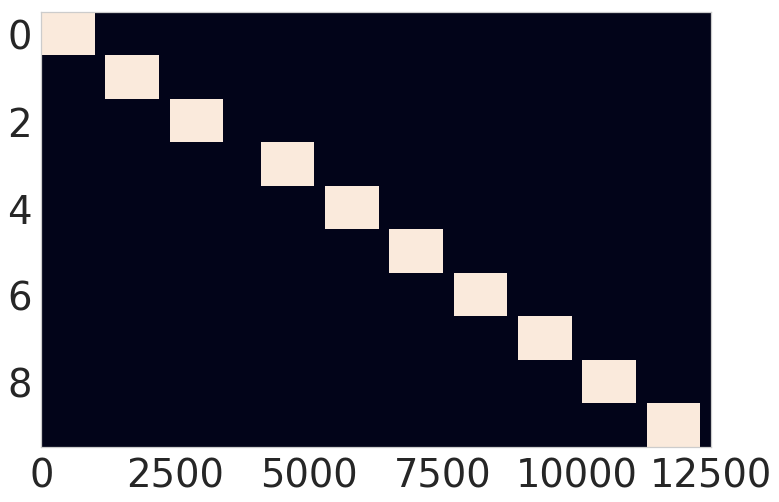

In [41]:
plt.imshow(timed_input.O, aspect='auto')

In [42]:
aux = calculate_connectivity_dictionaries(manager, training_times, inter_pulse_intervals,
                                          resting_time, n_patterns, tau_z_pre, tau_z_post)
w_dic_theo, w_dic_sim = aux

../network.py:498: RuntimeWarning: invalid value encountered in log
  self.T = self.nn.tau_a * np.log(1 / (1 - self.B))
../network.py:502: RuntimeWarning: invalid value encountered in less
  self.T[self.T < 0] = 0.0


In [43]:
for value in values_to_work:
    diff = w_dic_sim[value] - w_dic_theo[value]
    print(value, diff)

B21 0.0008502236679098774
w11 0.0002272315504818767
w21 -0.0014732157853379613
beta1 3.4744948368858886e-05
beta2 3.4744948368858886e-05
B12 0.0008502236679098774
w12 -0.0014732157853379613
B32 0.0017211358399746857
w22 0.0002272315504818767
w32 -0.0032150401294532838
beta3 3.4744948354870075e-05
Bfactor 0.000672901737454934
F 0.0008162147211934201


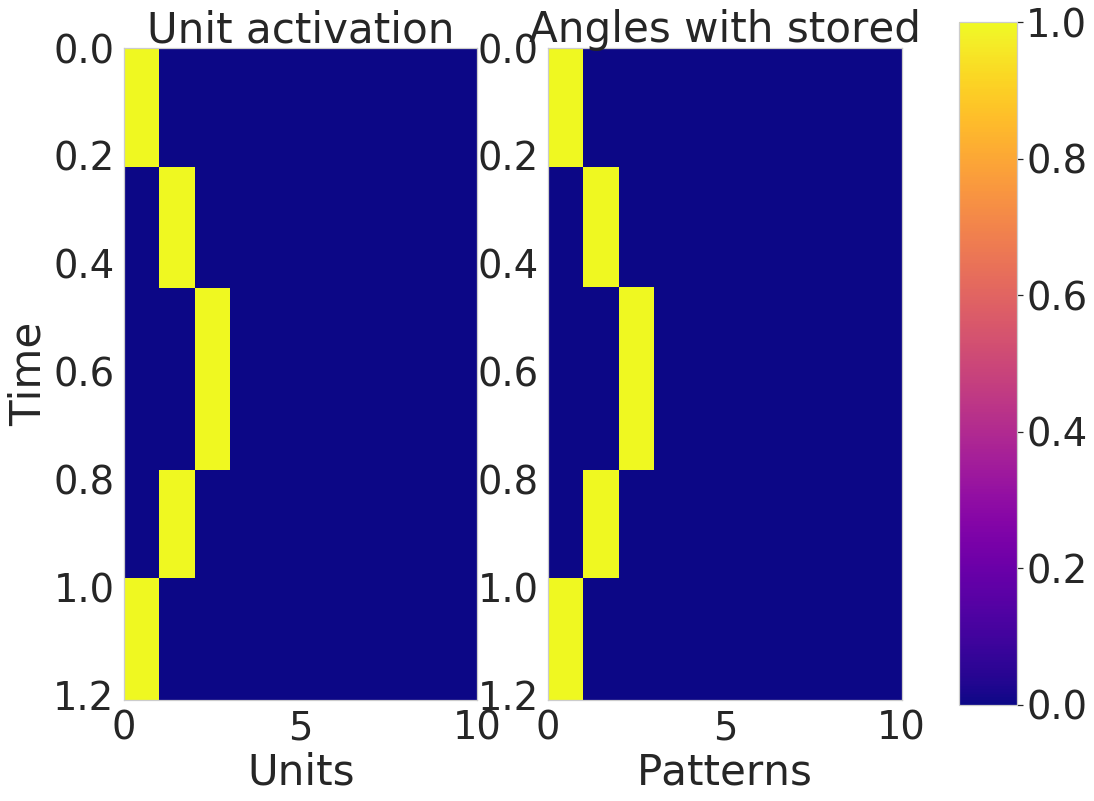

In [44]:
T_cue = tau_s
T_recall = 1.2
nr = manager.canonical_network_representation
aux = calculate_recall_quantities(manager, nr, T_recall, T_cue, remove=remove, reset=True, empty_history=True)
success, pattern_sequence, persistent_times, timings = aux

plot_network_activity_angle(manager);

In [45]:
print('sim: Bfactor = ', w_dic_sim['Bfactor'], 'B32', w_dic_sim['B32']) 
print('theo: Bfactor = ', w_dic_theo['Bfactor'], 'B32', w_dic_theo['B32']) 

sim: Bfactor =  0.7314548859297769 B32 1.0081588628627514
theo: Bfactor =  0.730781984192322 B32 1.0064377270227767


## Systematic

#### Normal IPI

In [232]:
strict_maximum = True

g_a = 5.0
g_I = 2.0
tau_a = 0.250
G = 1.0
sigma_out = 0.0
tau_s = 0.010
tau_z_pre = 0.025
tau_z_post = 0.005

hypercolumns = 1
minicolumns = 6
n_patterns = minicolumns

# Training protocol
training_times_base = 0.200
training_times = [training_times_base for i in range(n_patterns)]
ipi_base = 0.000
inter_pulse_intervals = [ipi_base for i in range(n_patterns)]
inter_sequence_interval = 0.0
resting_time = 0.0
epochs = 1
# Manager properties
values_to_save = ['o']

# Neural Network
nn = Network(hypercolumns, minicolumns, G=G, tau_s=tau_s, tau_z_pre=tau_z_pre, tau_z_post=tau_z_post,
                 tau_a=tau_a, g_a=g_a, g_I=g_I, sigma_out=sigma_out, epsilon=epsilon, prng=np.random,
                 strict_maximum=strict_maximum, perfect=False, normalized_currents=True)

# Build the manager
manager = NetworkManager(nn=nn, dt=dt, values_to_save=values_to_save)

# Build the representation
representation = PatternsRepresentation(manager.canonical_activity_representation[:n_patterns],
                                        minicolumns=minicolumns)


num = 20
x = np.linspace(0.00, 1 * training_times_base, num)
values_dictionary_sim = {name:np.zeros(num) for name in values_to_work}
values_dictionary_theo = {name:np.zeros(num) for name in values_to_work}
times_vector32 = np.zeros(num)
times_vector12 = np.zeros(num)
diff = np.zeros(num)
diff_theo = np.zeros(num)


success_vector = np.zeros(num)

for index, pulse in enumerate(x):
    ipi_jump = pulse
    inter_pulse_intervals[index2] = inter_pulse_intervals[index1] + ipi_jump
    # Build the protocol
    protocol = Protocol()
    protocol.simple_protocol(representation, training_times=training_times, inter_pulse_intervals=inter_pulse_intervals, 
                        inter_sequence_interval=inter_sequence_interval, epochs=epochs, resting_time=resting_time)

    # Run the protocol
    timed_input = manager.run_network_protocol_offline(protocol=protocol)

    aux = calculate_connectivity_dictionaries(manager, training_times, inter_pulse_intervals,
                                              resting_time, n_patterns, tau_z_pre, tau_z_post)
    w_dic_theo, w_dic_sim = aux
    for value in values_to_work:
        values_dictionary_sim[value][index] = w_dic_sim[value]
        values_dictionary_theo[value][index] = w_dic_theo[value]
        
    times_vector32[index] = w_dic_sim['T32']
    times_vector12[index] = w_dic_sim['Tfactor']
    diff[index] = calculate_difference(training_times, inter_pulse_intervals, resting_time,
                                       n_patterns, tau_z_pre, tau_z_post, g_a, tau_s=tau_s)
    diff_theo[index] = func(pulse, training_times_base, ipi_base, tau_z_pre, tau_z_post,
                            n_patterns, resting_time, g_a)

    if True:
        T_recall = w_dic_sim['T32'] * minicolumns
        T_cue = tau_s
        nr = manager.canonical_network_representation
        aux = calculate_recall_quantities(manager, nr, T_recall, T_cue, remove=remove, reset=True, empty_history=True)
        success, pattern_sequence, persistent_times, timings = aux
        success_vector[index] = success
    
values_dictionary_sim['xlabel'] = r'$IPI$'
values_dictionary_sim['xvalues'] = x
values_dictionary_sim['success'] = success_vector
values_dictionary_sim['Tper32'] = times_vector32
values_dictionary_sim['Tper12'] = times_vector12


values_dictionary_IPI_sim = values_dictionary_sim
values_dictionary_IPI_theo = values_dictionary_theo

../network.py:498: RuntimeWarning: invalid value encountered in log
  self.T = self.nn.tau_a * np.log(1 / (1 - self.B))
../network.py:502: RuntimeWarning: invalid value encountered in less
  self.T[self.T < 0] = 0.0


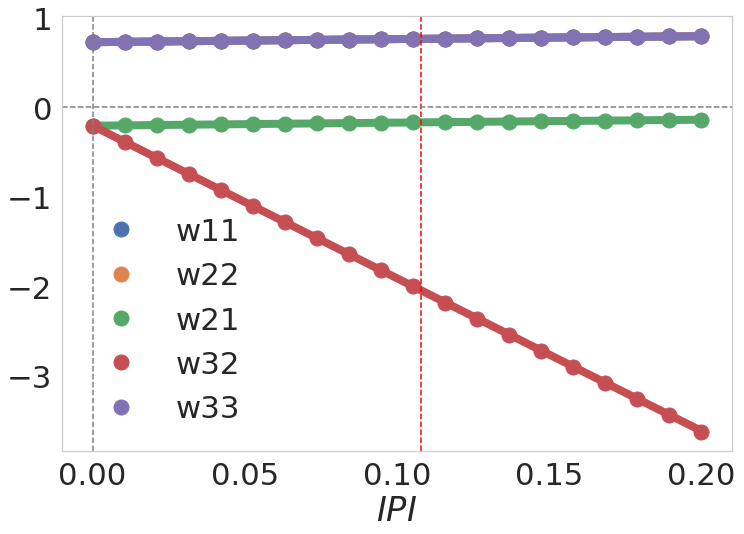

In [233]:
values_dictionary_sim = values_dictionary_IPI_sim
values_dictionary_theo = values_dictionary_IPI_theo

values_to_plot = ['w11', 'w22', 'w21', 'w32', 'w33']

x = values_dictionary_sim['xvalues']
xlabel = values_dictionary_sim['xlabel']
Tper_vector32 = values_dictionary_sim['Tper32']
Tper_vector12 = values_dictionary_sim['Tper12']
success = values_dictionary_sim['success'] 


index = 0

fig = plt.figure()
ax = fig.add_subplot(111)

for index, value in enumerate(values_to_plot):
    ysim = values_dictionary_sim[value]
    ytheo = values_dictionary_theo[value]
    ax.plot(x, ysim, 'o', color=colors[index], lw=lw, ms=ms, label=str(value))
    ax.plot(x, ytheo, '-', color=colors[index], lw=lw, ms=ms)
    
ax.set_xlabel(xlabel)
ax.legend(frameon=False)
ax.axvline(cut, ls='--', color='red')
ax.axhline(0, ls='--', color='gray')
ax.axvline(0, ls='--', color='gray');

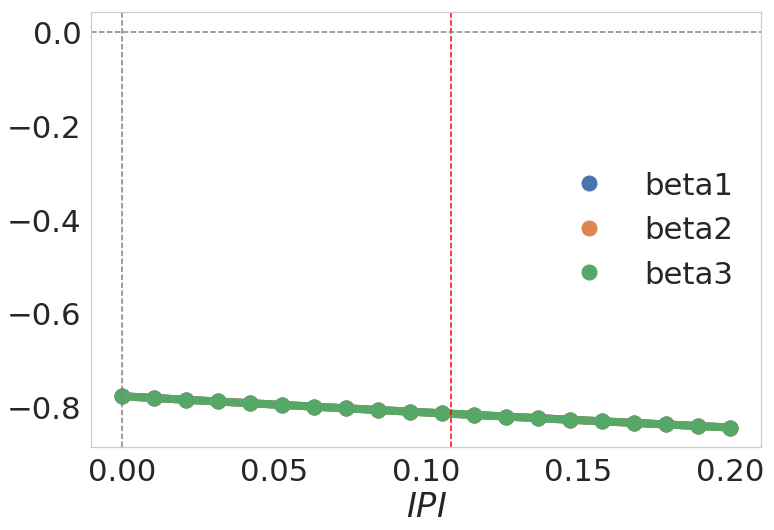

In [234]:
values_dictionary_sim = values_dictionary_IPI_sim
values_dictionary_theo = values_dictionary_IPI_theo

values_to_plot = ['beta1', 'beta2', 'beta3']

x = values_dictionary_sim['xvalues']
xlabel = values_dictionary_sim['xlabel']
Tper_vector32 = values_dictionary_sim['Tper32']
Tper_vector12 = values_dictionary_sim['Tper12']
success = values_dictionary_sim['success'] 


index = 0

fig = plt.figure()
ax = fig.add_subplot(111)

for index, value in enumerate(values_to_plot):
    ysim = values_dictionary_sim[value]
    ytheo = values_dictionary_theo[value]
    ax.plot(x, ysim, 'o', color=colors[index], lw=lw, ms=ms, label=str(value))
    ax.plot(x, ytheo, '-', color=colors[index], lw=lw, ms=ms)
    
ax.set_xlabel(xlabel)
ax.legend(frameon=False)
ax.axvline(cut, ls='--', color='red')
ax.axhline(0, ls='--', color='gray')
ax.axvline(0, ls='--', color='gray');

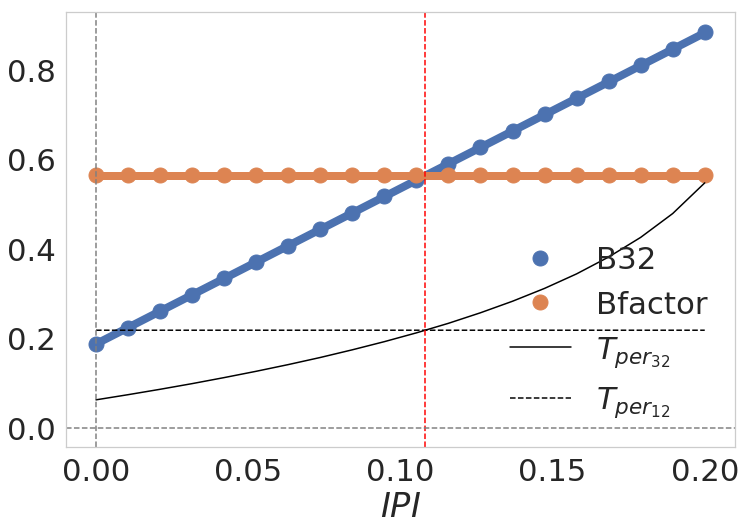

In [235]:
args = (training_times_base, ipi_base, tau_z_pre, tau_z_post, n_patterns, resting_time, g_a)
cut = brentq(func, a=0 , b=1.0, args=args)

values_dictionary_sim = values_dictionary_IPI_sim
values_dictionary_theo = values_dictionary_IPI_theo

values_to_plot = ['B32', 'Bfactor']

x = values_dictionary_sim['xvalues']
xlabel = values_dictionary_sim['xlabel']
Tper_vector32 = values_dictionary_sim['Tper32']
Tper_vector12 = values_dictionary_sim['Tper12']
success = values_dictionary_sim['success'] 


index = 0

fig = plt.figure()
ax = fig.add_subplot(111)

for index, value in enumerate(values_to_plot):
    ysim = values_dictionary_sim[value]
    ytheo = values_dictionary_theo[value]
    ax.plot(x, ysim, 'o', color=colors[index], lw=lw, ms=ms, label=str(value))
    ax.plot(x, ytheo, '-', color=colors[index], lw=lw, ms=ms)
    
if False:
    ax.plot(x, success, 'o-', color='black', lw=lw, ms=ms, label='success')
else:
    ax.plot(x, Tper_vector32, color='black', label=r'$T_{per_{32}}$')
    ax.plot(x, Tper_vector12, ls='--', color='black', label=r'$T_{per_{12}}$')


ax.set_xlabel(xlabel)
ax.legend(frameon=False)
ax.axvline(cut, ls='--', color='red')
ax.axhline(0, ls='--', color='gray')
ax.axvline(0, ls='--', color='gray');

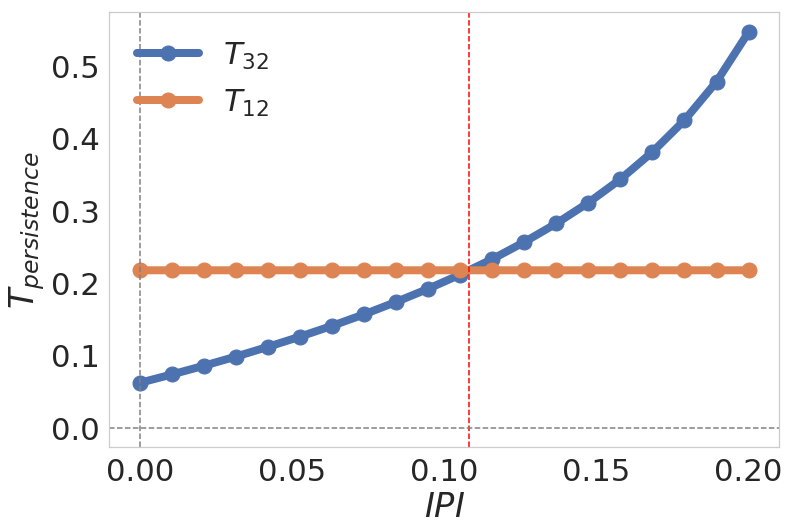

In [236]:
args = (training_times_base, ipi_base, tau_z_pre, tau_z_post, n_patterns, resting_time, g_a)
cut = brentq(func, a=0 , b=1.0, args=args)

values_dictionary_sim = values_dictionary_IPI_sim
values_dictionary_theo = values_dictionary_IPI_theo

values_to_plot = ['B32', 'Bfactor']

x = values_dictionary_sim['xvalues']
xlabel = values_dictionary_sim['xlabel']
Tper_vector32 = values_dictionary_sim['Tper32']
Tper_vector12 = values_dictionary_sim['Tper12']
success = values_dictionary_sim['success'] 


index = 0

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(x, Tper_vector32, 'o-', ms=ms, lw=lw, color=colors[0], label=r'$T_{32}$')
ax.plot(x, Tper_vector12, 'o-', ms=ms, lw=lw, color=colors[1], label=r'$T_{12}$')


ax.set_ylabel(r'$T_{persistence}$')
ax.set_xlabel(xlabel)
ax.legend(frameon=False)
ax.axvline(cut, ls='--', color='red')
ax.axhline(0, ls='--', color='gray')
ax.axvline(0, ls='--', color='gray');

### Intersection curves

In [68]:
training_times_base = 0.200
ipi_base = 0.00
tau_z_pre = 0.025
tau_z_post = 0.005

n_patterns = 10
resting_time = 0.0

g_a = 5.0


pulse =  0.150
diff = func(pulse, training_times_base, ipi_base, tau_z_pre, tau_z_post, n_patterns, resting_time, g_a)
print(diff)

-0.1456692894122128


In [128]:
training_times_base = 0.050
ipi_base = 0.00
tau_z_pre = 0.005
tau_z_post = 0.005
n_patterns = 10
resting_time = 0.0
g_a = 5.0

args = (training_times_base, ipi_base, tau_z_pre, tau_z_post, n_patterns, resting_time, g_a)
aux = brentq(func, a=0 , b=1.0, args=args)
print(aux)

0.009457640065586546


#### This quantities actually depend on g_a

In [142]:
g_a_set = [1.0, 2.5, 10.0]

for g_a in g_a_set:
    args = (training_times_base, ipi_base, tau_z_pre, tau_z_post, n_patterns, resting_time, g_a)
    aux = brentq(func, a=0 , b=2.0, args=args)
    print(aux)

0.6075664023587721
0.9136017313933495
1.2418448518192986


In [22]:
training_times_base = 0.200
ipi_base = 0.00
tau_z_pre = 0.025
tau_z_post = 0.005
n_patterns = 10
resting_time = 0.0
g_a = 5.0

num_z = 25
num_tt = 30
tau_z_pre_vector = np.linspace(tau_z_post, 0.150, num=num_z)
tt_vector = np.linspace(0.050, 1.0, num=num_tt)

max_ipi = np.zeros((num_z, num_tt))
max_ipi_norm = np.zeros((num_z, num_tt))


for index_z, tau_z_pre in enumerate(tau_z_pre_vector):
    for index_tt, training_times_base in enumerate(tt_vector):
        args = (training_times_base, ipi_base, tau_z_pre, tau_z_post, n_patterns, resting_time, g_a)
        aux = brentq(func, a=0 , b=1.5, args=args)
        max_ipi[index_z, index_tt] = aux
        max_ipi_norm[index_z, index_tt] = aux / training_times_base

Text(0.5,0,'training times (s)')

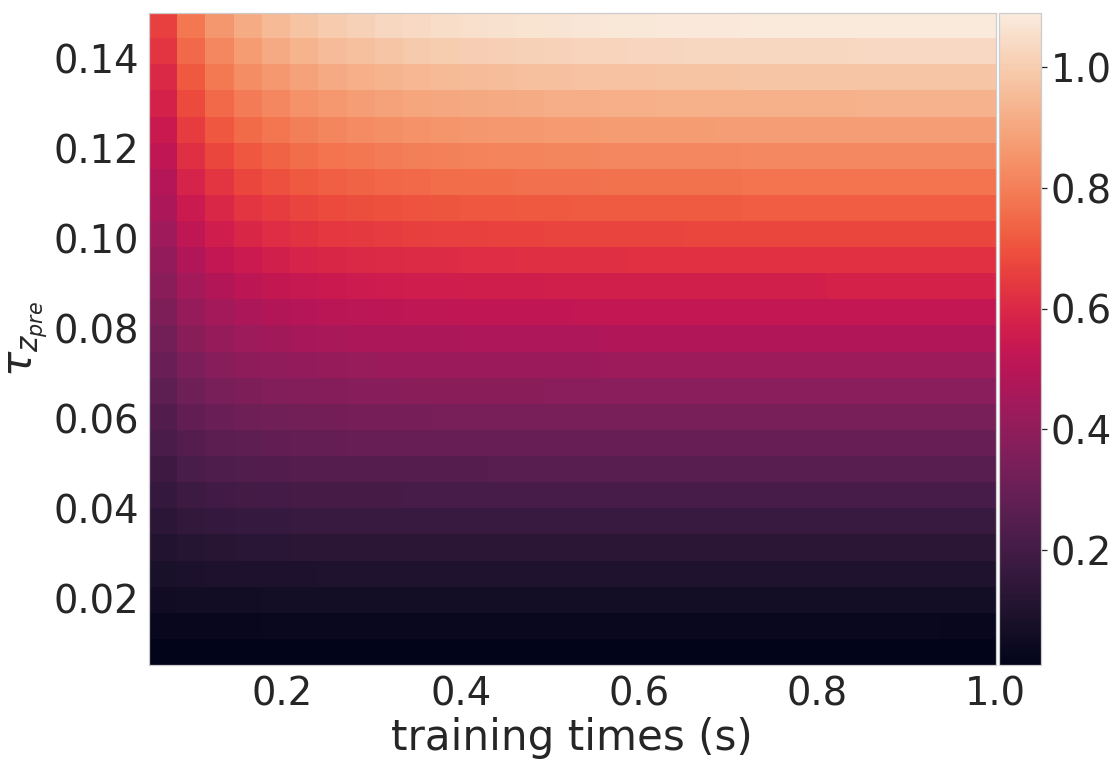

In [26]:
fig = plt.figure()
ax = fig.add_subplot(111)

extent = [tt_vector[0], tt_vector[-1], tau_z_pre_vector[0], tau_z_pre_vector[-1]]
im = ax.imshow(max_ipi, origin='lower', aspect='auto', extent=extent)

divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
ax.get_figure().colorbar(im, ax=ax, cax=cax)

ax.set_ylabel(r'$\tau_{z_{pre}}$')
ax.set_xlabel('training times (s)')

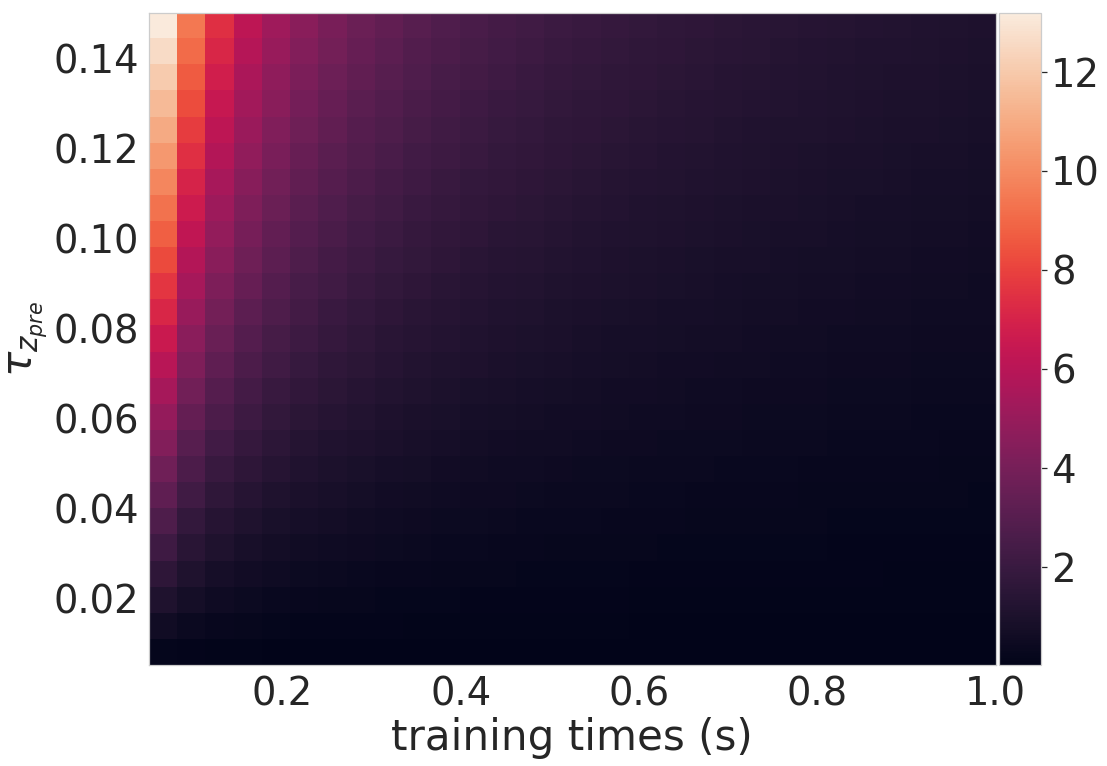

In [27]:
fig = plt.figure()
ax = fig.add_subplot(111)

extent = [tt_vector[0], tt_vector[-1], tau_z_pre_vector[0], tau_z_pre_vector[-1]]
im = ax.imshow(max_ipi_norm, origin='lower', aspect='auto', extent=extent)

divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
ax.get_figure().colorbar(im, ax=ax, cax=cax)

ax.set_ylabel(r'$\tau_{z_{pre}}$')
ax.set_xlabel('training times (s)')

ax.set_ylabel(r'$\tau_{z_{pre}}$')
ax.set_xlabel('training times (s)');

## Effects of the ipi base

In [51]:
training_times_base = 0.100
num_base = 10
ipi_base = 0.030
tau_z_pre = 0.025
tau_z_post = 0.025
n_patterns = 10
resting_time = 0.0
g_a = 5.0

ipi_base_space = np.linspace(0, 0.200, num=num_base)
ipi_max = np.zeros(num_base)
ipi_max_norm = np.zeros(num_base)
ipi_max_norm2 = np.zeros(num_base)
ipi_max_norm3 = np.zeros(num_base)

for ipi_index, ipi_base in enumerate(ipi_base_space):
    args = (training_times_base, ipi_base, tau_z_pre, tau_z_post, n_patterns, resting_time, g_a)
    aux = brentq(func, a=0 , b=1.0, args=args)
    ipi_max[ipi_index] = aux
    ipi_max_norm[ipi_index] = aux / training_times_base
    ipi_max_norm2[ipi_index] = aux / ipi_base
    ipi_max_norm3[ipi_index] = aux / (ipi_base + training_times_base)

/home/heberto/miniconda/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in double_scalars


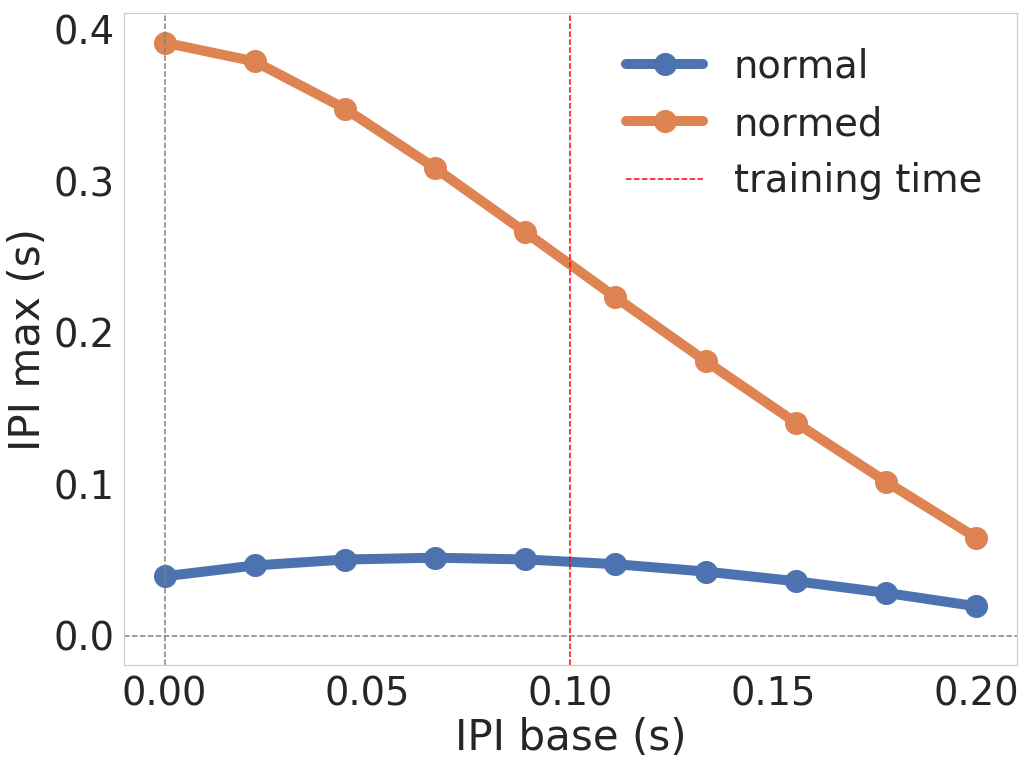

In [53]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(ipi_base_space, ipi_max, 'o-', ms=ms, lw=lw, label='normal')
#ax.plot(ipi_base_space, ipi_max_norm, 'o-', ms=ms, lw=lw, label='normed')
#ax.plot(ipi_base_space, ipi_max_norm2, 'o-', ms=ms, lw=lw, label='normed')
ax.plot(ipi_base_space, ipi_max_norm3, 'o-', ms=ms, lw=lw, label='normed')


ax.axhline(0, ls='--', color='gray')
ax.axvline(0, ls='--', color='gray')

ax.set_ylabel('IPI max (s)')
ax.set_xlabel('IPI base (s)')

ax.axvline(training_times_base, ls='--', color='red', label='training time')
ax.legend(frameon=False);

In [55]:
training_times_base = 0.100
num_base = 10
ipi_base = 0.030
tau_z_pre = 0.025
tau_z_post = 0.025
n_patterns = 10
resting_time = 0.0
g_a = 5.0

training_time_base_set = [0.050, 0.100, 0.150]
results_dictionary_normed = {}
results_dictionary_normal = {}


ipi_base_space = np.linspace(0, 0.200, num=num_base)
for training_times_base in training_time_base_set:
    ipi_max_norm3 = np.zeros(num_base)

    for ipi_index, ipi_base in enumerate(ipi_base_space):
        args = (training_times_base, ipi_base, tau_z_pre, tau_z_post, n_patterns, resting_time, g_a)
        aux = brentq(func, a=0 , b=1.0, args=args)
        ipi_max[ipi_index] = aux
        ipi_max_norm3[ipi_index] = aux / (ipi_base + training_times_base)
        
    results_dictionary_normed[training_times_base] = np.copy(ipi_max_norm3)
    results_dictionary_normal[training_times_base] = np.copy(ipi_max)

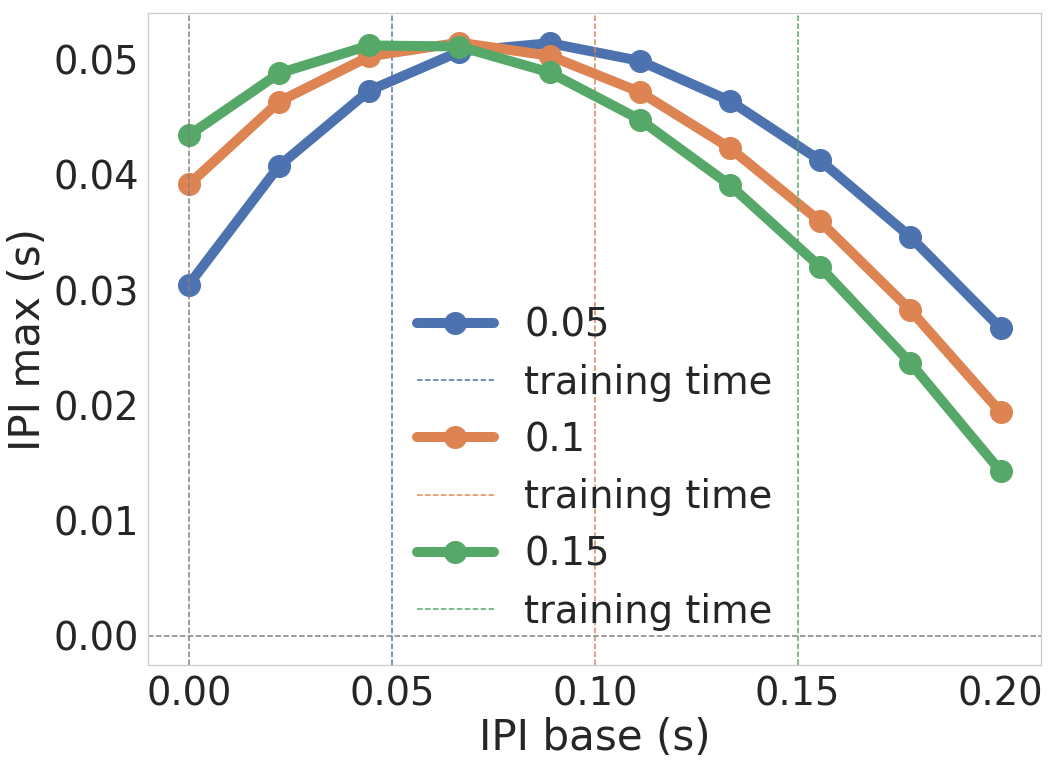

In [57]:
fig = plt.figure()
ax = fig.add_subplot(111)

results_dictionary = results_dictionary_normal

for index, training_times_base in enumerate(training_time_base_set):
    ipi_max = results_dictionary[training_times_base]
    ax.plot(ipi_base_space, ipi_max, 'o-', color=colors[index], ms=ms, lw=lw, label=str(training_times_base))
    ax.axvline(training_times_base, ls='--', color=colors[index])


ax.axhline(0, ls='--', color='gray')
ax.axvline(0, ls='--', color='gray')

ax.set_ylabel('IPI max (s)')
ax.set_xlabel('IPI base (s)')

ax.legend(frameon=False);

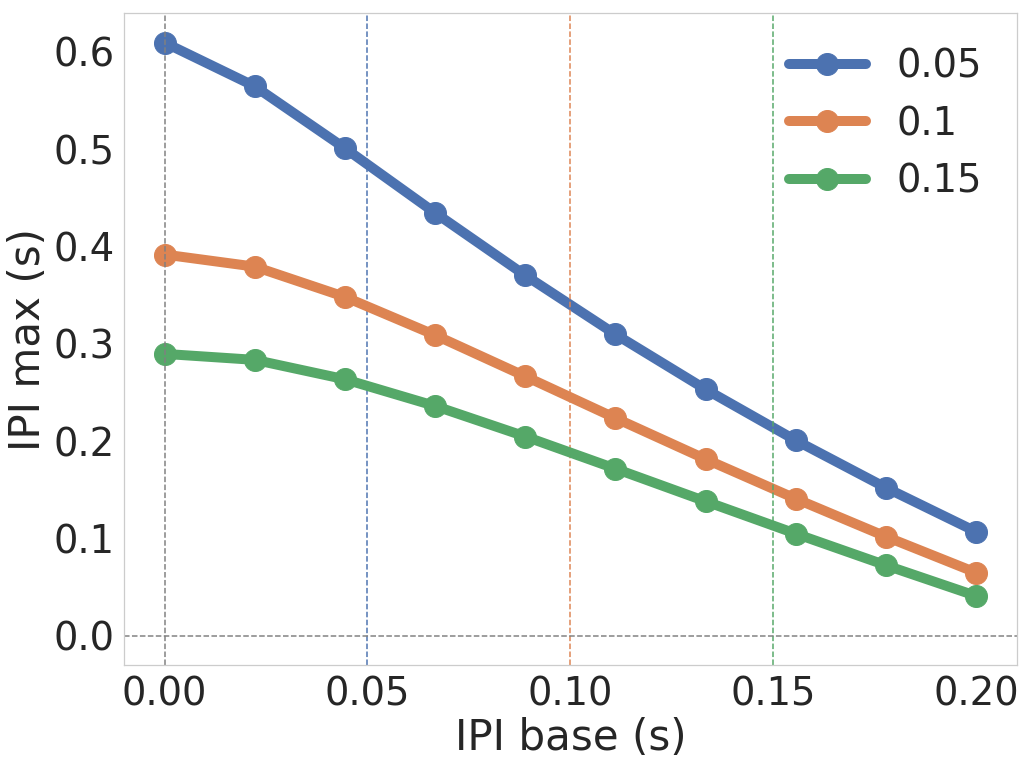

In [59]:
fig = plt.figure()
ax = fig.add_subplot(111)

results_dictionary = results_dictionary_normed

for index, training_times_base in enumerate(training_time_base_set):
    ipi_max = results_dictionary[training_times_base]
    ax.plot(ipi_base_space, ipi_max, 'o-', color=colors[index], ms=ms, lw=lw, label=str(training_times_base))
    ax.axvline(training_times_base, ls='--', color=colors[index])


ax.axhline(0, ls='--', color='gray')
ax.axvline(0, ls='--', color='gray')

ax.set_ylabel('IPI max (s)')
ax.set_xlabel('IPI base (s)')

ax.legend(frameon=False);

# Plot

## First the characterisation

In [237]:
%%time
strict_maximum = True

g_a = 5.0
g_I = 2.0
tau_a = 0.250
G = 1.0
sigma_out = 0.0
tau_s = 0.010
tau_z_pre = 0.025
tau_z_post = 0.005

hypercolumns = 1
minicolumns = 6
n_patterns = minicolumns

# Training protocol
training_times_base = 0.200
training_times = [training_times_base for i in range(n_patterns)]
ipi_base = 0.000
inter_pulse_intervals = [ipi_base for i in range(n_patterns)]
inter_sequence_interval = 0.0
resting_time = 0.0
epochs = 1
# Manager properties
values_to_save = ['o']

# Neural Network
nn = Network(hypercolumns, minicolumns, G=G, tau_s=tau_s, tau_z_pre=tau_z_pre, tau_z_post=tau_z_post,
                 tau_a=tau_a, g_a=g_a, g_I=g_I, sigma_out=sigma_out, epsilon=epsilon, prng=np.random,
                 strict_maximum=strict_maximum, perfect=False, normalized_currents=True)

# Build the manager
manager = NetworkManager(nn=nn, dt=dt, values_to_save=values_to_save)

# Build the representation
representation = PatternsRepresentation(manager.canonical_activity_representation[:n_patterns],
                                        minicolumns=minicolumns)


num = 20
x = np.linspace(0.00, 1 * training_times_base, num)
values_dictionary_sim = {name:np.zeros(num) for name in values_to_work}
values_dictionary_theo = {name:np.zeros(num) for name in values_to_work}
times_vector32 = np.zeros(num)
times_vector12 = np.zeros(num)


success_vector = np.zeros(num)

for index, pulse in enumerate(x):
    ipi_jump = pulse
    inter_pulse_intervals[index2] = inter_pulse_intervals[index1] + ipi_jump
    # Build the protocol
    protocol = Protocol()
    protocol.simple_protocol(representation, training_times=training_times, inter_pulse_intervals=inter_pulse_intervals, 
                        inter_sequence_interval=inter_sequence_interval, epochs=epochs, resting_time=resting_time)

    # Run the protocol
    timed_input = manager.run_network_protocol_offline(protocol=protocol)

    aux = calculate_connectivity_dictionaries(manager, training_times, inter_pulse_intervals,
                                              resting_time, n_patterns, tau_z_pre, tau_z_post)
    w_dic_theo, w_dic_sim = aux
    for value in values_to_work:
        values_dictionary_sim[value][index] = w_dic_sim[value]
        values_dictionary_theo[value][index] = w_dic_theo[value]
        
    times_vector32[index] = w_dic_sim['T32']
    times_vector12[index] = w_dic_sim['Tfactor']

    T_recall = w_dic_sim['T32'] * minicolumns
    T_cue = tau_s
    nr = manager.canonical_network_representation
    aux = calculate_recall_quantities(manager, nr, T_recall, T_cue, remove=remove, reset=True, empty_history=True)
    success, pattern_sequence, persistent_times, timings = aux
    success_vector[index] = success
    
values_dictionary_sim['xlabel'] = r'$IPI$ (s)'
values_dictionary_sim['xvalues'] = x
values_dictionary_sim['success'] = success_vector
values_dictionary_sim['Tper32'] = times_vector32
values_dictionary_sim['Tper12'] = times_vector12


values_dictionary_IPI_sim = values_dictionary_sim
values_dictionary_IPI_theo = values_dictionary_theo

../network.py:498: RuntimeWarning: invalid value encountered in log
  self.T = self.nn.tau_a * np.log(1 / (1 - self.B))
../network.py:502: RuntimeWarning: invalid value encountered in less
  self.T[self.T < 0] = 0.0


CPU times: user 39.4 s, sys: 352 ms, total: 39.7 s
Wall time: 36.3 s


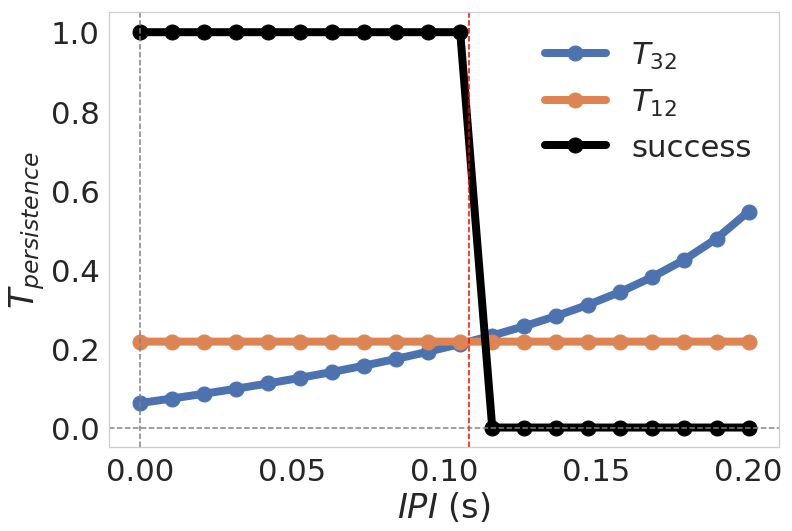

In [238]:
args = (training_times_base, ipi_base, tau_z_pre, tau_z_post, n_patterns, resting_time, g_a)
cut = brentq(func, a=0 , b=1.0, args=args)

values_dictionary_sim = values_dictionary_IPI_sim
values_dictionary_theo = values_dictionary_IPI_theo

values_to_plot = ['B32', 'Bfactor']

x = values_dictionary_sim['xvalues']
xlabel = values_dictionary_sim['xlabel']
Tper_vector32 = values_dictionary_sim['Tper32']
Tper_vector12 = values_dictionary_sim['Tper12']
success = values_dictionary_sim['success'] 


index = 0

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(x, Tper_vector32, 'o-', ms=ms, lw=lw, color=colors[0], label=r'$T_{32}$')
ax.plot(x, Tper_vector12, 'o-', ms=ms, lw=lw, color=colors[1], label=r'$T_{12}$')
ax.plot(x, success, 'o-', color='black', lw=lw, ms=ms, label='success')

ax.set_ylabel(r'$T_{persistence}$')
ax.set_xlabel(xlabel)
ax.legend(frameon=False)
ax.axvline(cut, ls='--', color='red')
ax.axhline(0, ls='--', color='gray')
ax.axvline(0, ls='--', color='gray');

## Then two examples

#### Good side

In [253]:
%%time
strict_maximum = True

g_I = 2.0
tau_a = 0.250
G = 1.0
sigma_out = 0.0
tau_s = 0.010
tau_z_pre = 0.025
tau_z_post = 0.005



# Training protocol
training_times_base = 0.200
ipi_base = 0.000
resting_time = 0.0
pulse1 = 0.050


manager = build_example(pulse1, minicolumns=minicolumns, hypercolumns=hypercolumns, tt=training_times_base, 
                        ipi=ipi_base, g_a=g_a, tau_z_pre=tau_z_pre, tau_z_post=tau_z_post, 
                        resting_time=resting_time, T_persistence=0.100)

T_cue = tau_s
T_recall = 0.475
nr = manager.canonical_network_representation
aux = calculate_recall_quantities(manager, nr, T_recall, T_cue, remove=remove, reset=True, empty_history=True)
success, pattern_sequence, persistent_times, timings = aux
print(success)
o1 = np.copy(manager.history['o'])

1.0
CPU times: user 696 ms, sys: 32 ms, total: 728 ms
Wall time: 688 ms


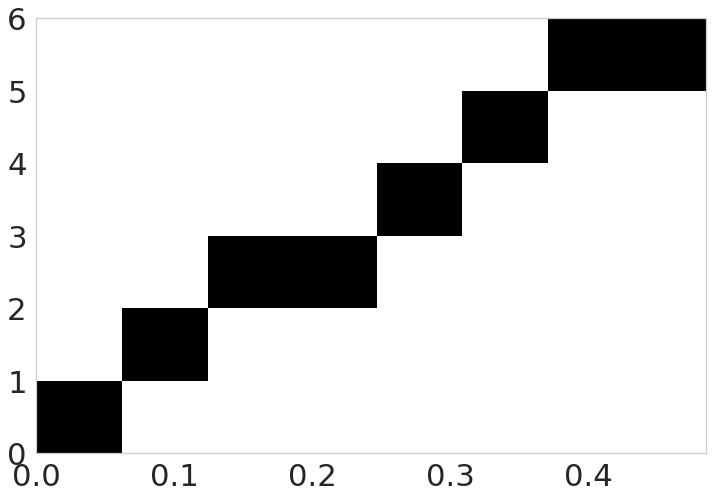

In [254]:
cmap = matplotlib.cm.binary

fig = plt.figure()
ax = fig.add_subplot(111)

extent = [0, manager.T_recall_total, 0, minicolumns]
ax.imshow(o1.T, cmap=cmap, origin='lower', aspect='auto', extent=extent)


#### Wrong side

In [255]:
%%time
pulse2 = 0.150


manager = build_example(pulse2, minicolumns=minicolumns, hypercolumns=hypercolumns, tt=training_times_base, 
                        ipi=ipi_base, g_a=g_a, tau_z_pre=tau_z_pre, tau_z_post=tau_z_post, 
                        resting_time=resting_time, T_persistence=0.100)

nr = manager.canonical_network_representation
aux = calculate_recall_quantities(manager, nr, T_recall, T_cue, remove=remove, reset=True, empty_history=True)
success, pattern_sequence, persistent_times, timings = aux
o2 = np.copy(manager.history['o'])
print(success)

0.0
CPU times: user 1.53 s, sys: 56 ms, total: 1.59 s
Wall time: 1.33 s


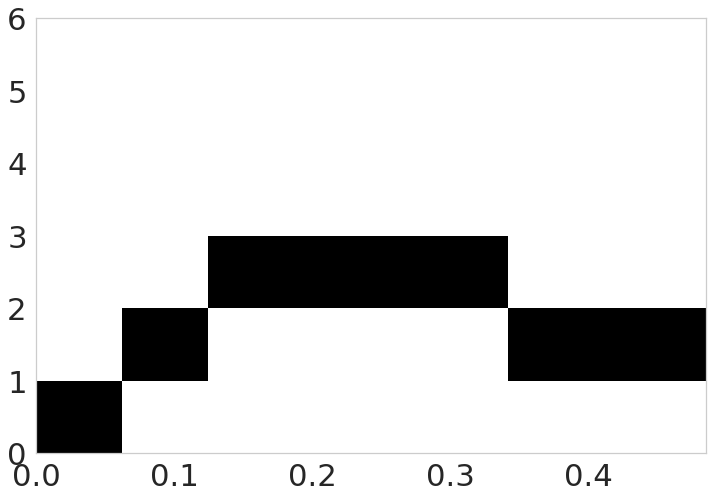

In [256]:
cmap = matplotlib.cm.binary

fig = plt.figure()
ax = fig.add_subplot(111)

extent = [0, manager.T_recall_total, 0, minicolumns]
ax.imshow(o2.T, cmap=cmap, origin='lower', aspect='auto', extent=extent)


## Then the systematic exploration of max ipi

In [257]:
training_times_base = 0.200
ipi_base = 0.00
tau_z_pre = 0.025
tau_z_post = 0.005
n_patterns = 10
resting_time = 0.0

num_z = 50
num_tt = 50
tau_z_pre_vector = np.linspace(tau_z_post, 0.150, num=num_z)
tt_vector = np.linspace(0.050, 1.0, num=num_tt)

max_ipi = np.zeros((num_z, num_tt))
max_ipi_norm = np.zeros((num_z, num_tt))


for index_z, tau_z_pre in enumerate(tau_z_pre_vector):
    for index_tt, training_times_base in enumerate(tt_vector):
        args = (training_times_base, ipi_base, tau_z_pre, tau_z_post, n_patterns, resting_time, g_a)
        aux = brentq(func, a=0 , b=1.5, args=args)
        max_ipi[index_z, index_tt] = aux
        max_ipi_norm[index_z, index_tt] = aux / training_times_base

Text(0.5,0,'training times (s)')

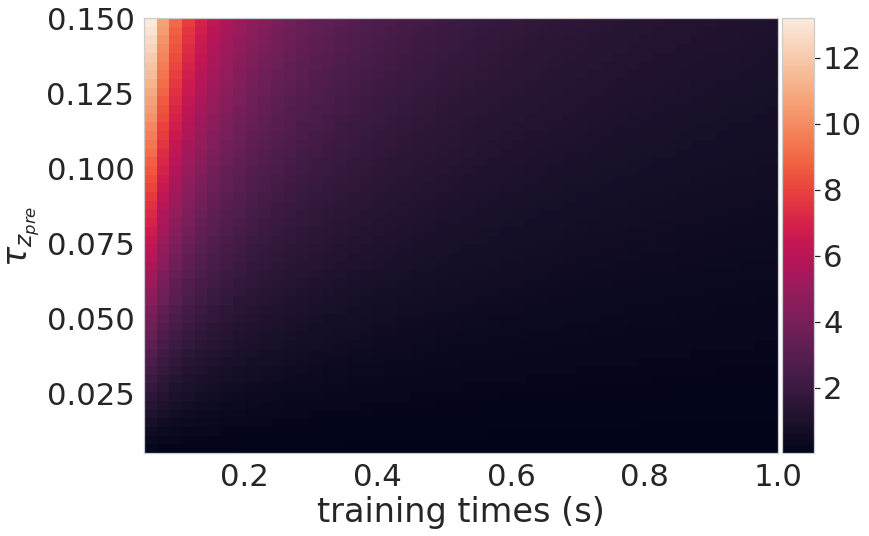

In [258]:
fig = plt.figure()
ax = fig.add_subplot(111)

extent = [tt_vector[0], tt_vector[-1], tau_z_pre_vector[0], tau_z_pre_vector[-1]]
im = ax.imshow(max_ipi_norm, origin='lower', aspect='auto', extent=extent)

divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
ax.get_figure().colorbar(im, ax=ax, cax=cax)

ax.set_ylabel(r'$\tau_{z_{pre}}$')
ax.set_xlabel('training times (s)')

## Store

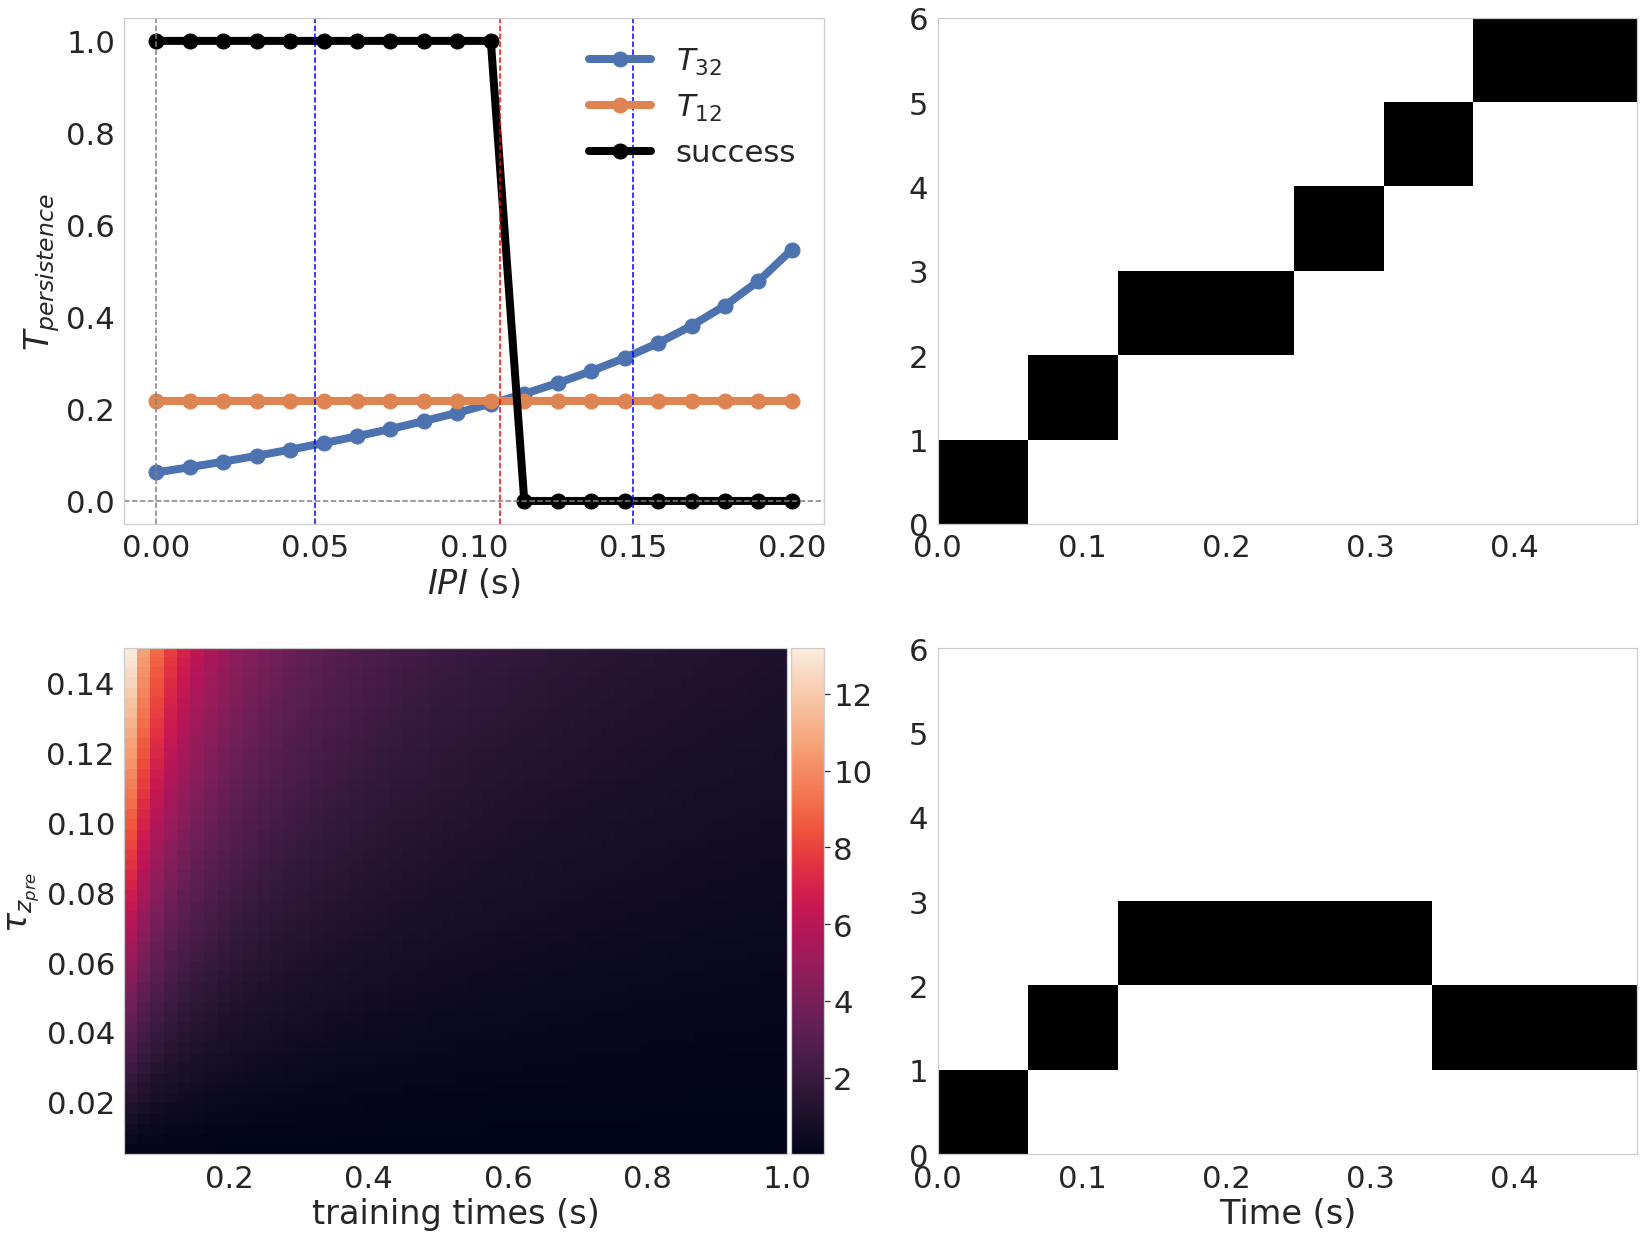

In [259]:
lw = 8
ms = 15

sns.set(font_scale=2.8)
sns.set_style("whitegrid", {'axes.grid': False})


save = True
legend = False
symbols_in_imshow = True
captions = False

factor_scale = 1.5
s1 = int(16 * factor_scale)
s2 = int(12 * factor_scale)

gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(s1, s2))



# The characterisation
ax = fig.add_subplot(gs[0, 0])
values_dictionary_sim = values_dictionary_IPI_sim

x = values_dictionary_sim['xvalues']
xlabel = values_dictionary_sim['xlabel']
Tper_vector32 = values_dictionary_sim['Tper32']
Tper_vector12 = values_dictionary_sim['Tper12']
success = values_dictionary_sim['success'] 

ax.plot(x, Tper_vector32, 'o-', ms=ms, lw=lw, color=colors[0], label=r'$T_{32}$')
ax.plot(x, Tper_vector12, 'o-', ms=ms, lw=lw, color=colors[1], label=r'$T_{12}$')
ax.plot(x, success, 'o-', color='black', lw=lw, ms=ms, label='success')

ax.set_ylabel(r'$T_{persistence}$')
ax.set_xlabel(xlabel)
ax.legend(frameon=False)
ax.axvline(cut, ls='--', color='red')
ax.axhline(0, ls='--', color='gray')
ax.axvline(0, ls='--', color='gray')

ax.axvline(pulse1, ls='--', color='blue')
ax.axvline(pulse2, ls='--', color='blue')

###############33
# First example
###########33
ax = fig.add_subplot(gs[0, 1])
cmap = matplotlib.cm.binary

extent = [0, manager.T_recall_total, 0, minicolumns]
ax.imshow(o1.T, cmap=cmap, origin='lower', aspect='auto', extent=extent)

###############333
# Second example
#################
ax = fig.add_subplot(gs[1, 1])
cmap = matplotlib.cm.binary
extent = [0, manager.T_recall_total, 0, minicolumns]
ax.imshow(o2.T, cmap=cmap, origin='lower', aspect='auto', extent=extent)
ax.set_xlabel('Time (s)')

if captions:
    size = 30
    fig.text(0.05, 0.95, 'a)', size=size)
    fig.text(0.50, 0.95, 'b)', size=size)
    fig.text(0.50, 0.50, 'c)', size=size)

    
ax = fig.add_subplot(gs[1, 0])

extent = [tt_vector[0], tt_vector[-1], tau_z_pre_vector[0], tau_z_pre_vector[-1]]
im = ax.imshow(max_ipi_norm, origin='lower', aspect='auto', extent=extent)

divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
ax.get_figure().colorbar(im, ax=ax, cax=cax)

ax.set_ylabel(r'$\tau_{z_{pre}}$')
ax.set_xlabel('training times (s)')

fig.tight_layout()
    
if save:
    directory = '../plot_producers/'
    file_name = 'ipi_non_homogenous'
    format_string = '.pdf'
    string_to_save = directory + file_name + format_string
    fig.savefig(string_to_save, frameon=False, dpi=110, bbox_inches='tight')